In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

Mounted at /content/drive


In [2]:
## Data Loading and Preprocessing

In [3]:
# Paths to dataset directories in Drive
base_dir = '/content/drive/MyDrive/fish_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test generators (no augmentation, only rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)
val_generator = test_val_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = test_val_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1102 images belonging to 11 classes.
Found 3197 images belonging to 11 classes.


In [4]:
### Model 1: CNN from Scratch

In [5]:
num_classes = train_generator.num_classes

model_cnn = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 10
history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Save the trained CNN model
model_cnn.save('/content/drive/MyDrive/fish_cnn_scratch.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1574s 8s/step - accuracy: 0.2579 - loss: 2.1293 - val_accuracy: 0.4864 - val_loss: 1.4954
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 885s 5s/step - accuracy: 0.4590 - loss: 1.5185 - val_accuracy: 0.7178 - val_loss: 0.9229
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 898s 5s/step - accuracy: 0.5480 - loss: 1.2316 - val_accuracy: 0.6470 - val_loss: 0.9710
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 883s 5s/step - accuracy: 0.5913 - loss: 1.0841 - val_accuracy: 0.7704 - val_loss: 0.7000
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 901s 5s/step - accuracy: 0.6616 - loss: 0.9342 - val_accuracy: 0.7169 - val_loss: 0.8090
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 865s 4s/step - accuracy: 0.7112 - loss: 0.7914 - val_accuracy: 0.8294 - val_loss: 0.5199
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 876s 4s/step - accuracy: 0.7421 - loss: 0.7133 - val_accuracy: 0.8702 - val_loss: 0.4209
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.7687 - loss: 0.6353 - val_acc

In [7]:
### Model 2: Transfer Learning with Pre-trained Networks

In [8]:
##VGG16-based Model

In [9]:
# Update image size for faster processing
img_height, img_width = 150, 150
batch_size = 16

# Re-create data generators with smaller images & lighter augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)
test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)
val_generator = test_val_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = test_val_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)

num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())

# ====== VGG16 Optimized ======
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

base_vgg = VGG16(weights='imagenet', include_top=False,
                 input_shape=(img_height, img_width, 3))
base_vgg.trainable = False  # freeze convolutional layers

model_vgg = models.Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
vgg_checkpoint = ModelCheckpoint('/content/drive/MyDrive/fish_vgg16_best.h5',
                                  monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train
history_vgg = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # fewer epochs
    callbacks=[vgg_checkpoint, early_stop]
)

Found 6225 images belonging to 11 classes.
Found 1102 images belonging to 11 classes.
Found 3197 images belonging to 11 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4381 - loss: 1.6949
Epoch 1: val_accuracy improved from -inf to 0.80399, saving model to /content/drive/MyDrive/fish_vgg16_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 2061s 5s/step - accuracy: 0.4385 - loss: 1.6939 - val_accuracy: 0.8040 - val_loss: 0.7175
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7560 - loss: 0.7435
Epoch 2: val_accuracy improved from 0.80399 to 0.87205, saving model to /content/drive/MyDrive/fish_vgg16_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 2037s 5s/step - accuracy: 0.7561 - loss: 0.7433 - val_accuracy: 0.8721 - val_loss: 0.4569
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8258 - loss: 0.5443
Epoch 3: val_accuracy improved from 0.87205 to 0.88476, saving model to /content/drive/MyDrive/fish_vgg16_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 2076s 5s/step - accuracy: 0.8259 - loss: 0.5442 - val_accuracy: 0.8848 - val_loss: 0.3812
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8492 - loss: 0.4432
Epoch 4: val_accuracy improved from 0.88476 to 0.91379, saving model to /content/drive/MyDrive/fish_vgg16_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 2069s 5s/step - accuracy: 0.8492 - loss: 0.4432 - val_accuracy: 0.9138 - val_loss: 0.3003
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8751 - loss: 0.3701
Epoch 5: val_accuracy did not improve from 0.91379
390/390 ━━━━━━━━━━━━━━━━━━━━ 2044s 5s/step - accuracy: 0.8751 - loss: 0.3701 - val_accuracy: 0.9020 - val_loss: 0.3151


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, history, generator, model_name, model_path=None):
    preds = model.predict(generator)
    y_pred = np.argmax(preds, axis=1)
    y_true = generator.classes
    class_names = list(generator.class_indices.keys())

    acc = np.mean(y_pred == y_true)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=class_names))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()

    results = {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}
    if model_path:
        results["Model Path"] = model_path
    return results

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1564 - loss: 2.3701
Epoch 1: val_accuracy improved from -inf to 0.16969, saving model to /content/drive/MyDrive/fish_resnet50_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.1565 - loss: 2.3700 - val_accuracy: 0.1697 - val_loss: 2.2811
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1768 - loss: 2.2756
Epoch 2: val_accuracy did not improve from 0.16969
390/390 ━━━━━━━━━━━━━━━━━━━━ 701s 2s/step - accuracy: 0.1768 - loss: 2.2756 - val_accuracy: 0.1697 - val_loss: 2.2001
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2012 - loss: 2.2067
Epoch 3: val_accuracy improved from 0.16969 to 0.27495, saving model to /content/drive/MyDrive/fish_resnet50_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.2012 - loss: 2.2067 - val_accuracy: 0.2750 - val_loss: 2.1302
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2279 - loss: 2.1295
Epoch 4: val_accuracy improved from 0.27495 to 0.28857, saving model to /content/drive/MyDrive/fish_resnet50_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 743s 2s/step - accuracy: 0.2279 - loss: 2.1295 - val_accuracy: 0.2886 - val_loss: 2.0506
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2496 - loss: 2.0790
Epoch 5: val_accuracy improved from 0.28857 to 0.30490, saving model to /content/drive/MyDrive/fish_resnet50_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 707s 2s/step - accuracy: 0.2496 - loss: 2.0789 - val_accuracy: 0.3049 - val_loss: 1.9959


200/200 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step

=== ResNet50 TL (Optimized) Classification Report ===
                                  precision    recall  f1-score   support

                     animal fish       0.42      0.88      0.57       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.11      0.04      0.06       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       315
   fish sea_food hourse_mackerel       0.21      0.79      0.34       286
        fish sea_food red_mullet       0.17      0.06      0.09       291
     fish sea_food red_sea_bream       0.32      0.05      0.09       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.36      0.22      0.27       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.34      0.72      0.46       292

             

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


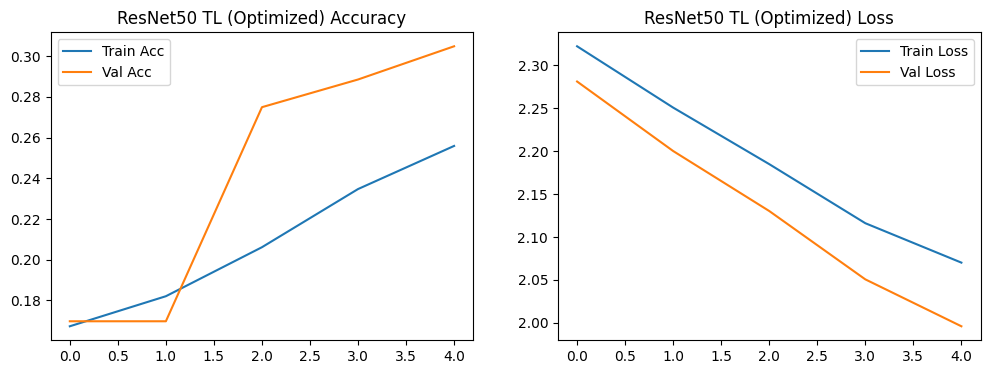

In [16]:
## ResNet50 (Optimized)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

base_resnet = ResNet50(weights='imagenet', include_top=False,
                       input_shape=(img_height, img_width, 3))
base_resnet.trainable = False

model_resnet = models.Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_checkpoint = ModelCheckpoint('/content/drive/MyDrive/fish_resnet50_best.h5',
                                    monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[resnet_checkpoint, early_stop]
)

model_resnet_best = tf.keras.models.load_model('/content/drive/MyDrive/fish_resnet50_best.h5')
comparison_results.append(evaluate_model(model_resnet_best, history_resnet, test_generator, 'ResNet50 TL (Optimized)', '/content/drive/MyDrive/fish_resnet50_best.h5'))

In [18]:
## MobileNet (Optimized)

/tmp/ipython-input-1587848986.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_mobilenet = MobileNet(weights='imagenet', include_top=False,


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6574 - loss: 1.2202
Epoch 1: val_accuracy improved from -inf to 0.97731, saving model to /content/drive/MyDrive/fish_mobilenet_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 481ms/step - accuracy: 0.6577 - loss: 1.2188 - val_accuracy: 0.9773 - val_loss: 0.0985
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.9229 - loss: 0.2448
Epoch 2: val_accuracy did not improve from 0.97731
390/390 ━━━━━━━━━━━━━━━━━━━━ 184s 471ms/step - accuracy: 0.9229 - loss: 0.2448 - val_accuracy: 0.9755 - val_loss: 0.0783
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9352 - loss: 0.1802
Epoch 3: val_accuracy did not improve from 0.97731
390/390 ━━━━━━━━━━━━━━━━━━━━ 202s 518ms/step - accuracy: 0.9352 - loss: 0.1802 - val_accuracy: 0.9710 - val_loss: 0.1057


200/200 ━━━━━━━━━━━━━━━━━━━━ 68s 334ms/step

=== MobileNet TL (Optimized) Classification Report ===
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.50      0.31      0.38        13
   fish sea_food black_sea_sprat       0.98      1.00      0.99       298
   fish sea_food gilt_head_bream       0.99      0.99      0.99       315
   fish sea_food hourse_mackerel       0.99      0.97      0.98       286
        fish sea_food red_mullet       0.97      0.93      0.95       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       0.97      0.98      0.97       327
            fish sea_food shrimp       0.99      0.99      0.99       289
fish sea_food striped_red_mullet       0.92      0.95      0.93       293
             fish sea_food trout       1.00      0.99      0.99       292

          

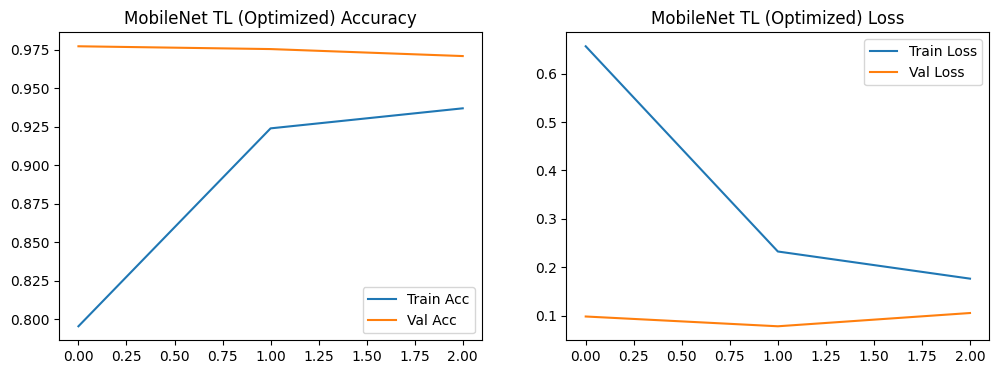

In [19]:
from tensorflow.keras.applications import MobileNet

base_mobilenet = MobileNet(weights='imagenet', include_top=False,
                           input_shape=(img_height, img_width, 3))
base_mobilenet.trainable = False

model_mobilenet = models.Sequential([
    base_mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mobilenet_checkpoint = ModelCheckpoint('/content/drive/MyDrive/fish_mobilenet_best.h5',
                                       monitor='val_accuracy', save_best_only=True, verbose=1)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[mobilenet_checkpoint, early_stop]
)

model_mobilenet_best = tf.keras.models.load_model('/content/drive/MyDrive/fish_mobilenet_best.h5')
comparison_results.append(evaluate_model(model_mobilenet_best, history_mobilenet, test_generator, 'MobileNet TL (Optimized)', '/content/drive/MyDrive/fish_mobilenet_best.h5'))

In [20]:
##  InceptionV3 (Optimized)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 918ms/step - accuracy: 0.5561 - loss: 1.7358
Epoch 1: val_accuracy improved from -inf to 0.89292, saving model to /content/drive/MyDrive/fish_inceptionv3_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.5564 - loss: 1.7341 - val_accuracy: 0.8929 - val_loss: 0.3433
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.8064 - loss: 0.5992
Epoch 2: val_accuracy improved from 0.89292 to 0.92559, saving model to /content/drive/MyDrive/fish_inceptionv3_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.8064 - loss: 0.5991 - val_accuracy: 0.9256 - val_loss: 0.2469
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.8425 - loss: 0.4582
Epoch 3: val_accuracy improved from 0.92559 to 0.93648, saving model to /content/drive/MyDrive/fish_inceptionv3_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.8425 - loss: 0.4582 - val_accuracy: 0.9365 - val_loss: 0.2121
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.8527 - loss: 0.4392
Epoch 4: val_accuracy did not improve from 0.93648
390/390 ━━━━━━━━━━━━━━━━━━━━ 436s 1s/step - accuracy: 0.8527 - loss: 0.4391 - val_accuracy: 0.9328 - val_loss: 0.1857
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.8743 - loss: 0.3548
Epoch 5: val_accuracy improved from 0.93648 to 0.94737, saving model to /content/drive/MyDrive/fish_inceptionv3_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 419s 1s/step - accuracy: 0.8743 - loss: 0.3549 - val_accuracy: 0.9474 - val_loss: 0.2035


200/200 ━━━━━━━━━━━━━━━━━━━━ 178s 862ms/step

=== InceptionV3 TL (Optimized) Classification Report ===
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.97      0.95      0.96       298
   fish sea_food gilt_head_bream       0.97      0.87      0.92       315
   fish sea_food hourse_mackerel       0.93      0.97      0.95       286
        fish sea_food red_mullet       0.96      0.94      0.95       291
     fish sea_food red_sea_bream       0.90      0.99      0.94       273
          fish sea_food sea_bass       0.97      0.81      0.89       327
            fish sea_food shrimp       0.99      0.99      0.99       289
fish sea_food striped_red_mullet       0.86      0.95      0.90       293
             fish sea_food trout       0.90      1.00      0.94       292

       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


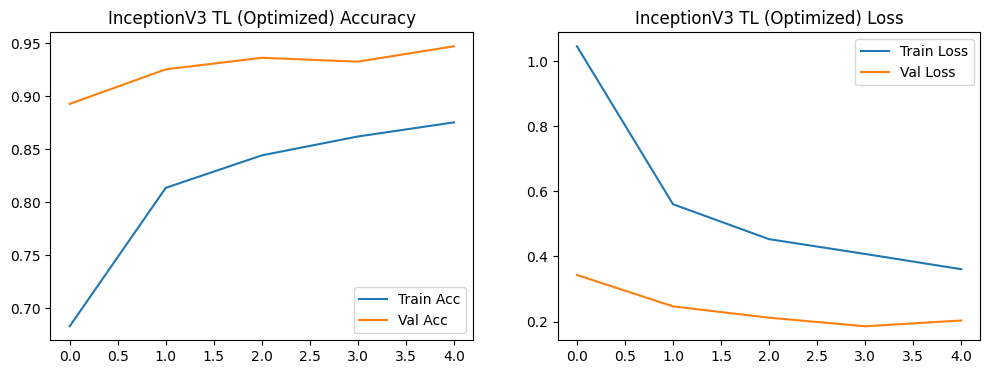

In [21]:
from tensorflow.keras.applications import InceptionV3

base_inception = InceptionV3(weights='imagenet', include_top=False,
                             input_shape=(img_height, img_width, 3))
base_inception.trainable = False

model_inception = models.Sequential([
    base_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/fish_inceptionv3_best.h5',
                                       monitor='val_accuracy', save_best_only=True, verbose=1)

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[inception_checkpoint, early_stop]
)

model_inception_best = tf.keras.models.load_model('/content/drive/MyDrive/fish_inceptionv3_best.h5')
comparison_results.append(evaluate_model(model_inception_best, history_inception, test_generator, 'InceptionV3 TL (Optimized)', '/content/drive/MyDrive/fish_inceptionv3_best.h5'))

In [22]:
## EfficientNetB0 (Optimized)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.1475 - loss: 2.3794
Epoch 1: val_accuracy improved from -inf to 0.16969, saving model to /content/drive/MyDrive/fish_efficientnetb0_best.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 314s 769ms/step - accuracy: 0.1475 - loss: 2.3793 - val_accuracy: 0.1697 - val_loss: 2.3138
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.1749 - loss: 2.3153
Epoch 2: val_accuracy did not improve from 0.16969
390/390 ━━━━━━━━━━━━━━━━━━━━ 292s 750ms/step - accuracy: 0.1749 - loss: 2.3153 - val_accuracy: 0.1697 - val_loss: 2.3115
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.1800 - loss: 2.3189
Epoch 3: val_accuracy did not improve from 0.16969
390/390 ━━━━━━━━━━━━━━━━━━━━ 288s 739ms/step - accuracy: 0.1800 - loss: 2.3189 - val_accuracy: 0.1697 - val_loss: 2.3112


200/200 ━━━━━━━━━━━━━━━━━━━━ 124s 608ms/step

=== EfficientNetB0 TL (Optimized) Classification Report ===
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       315
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


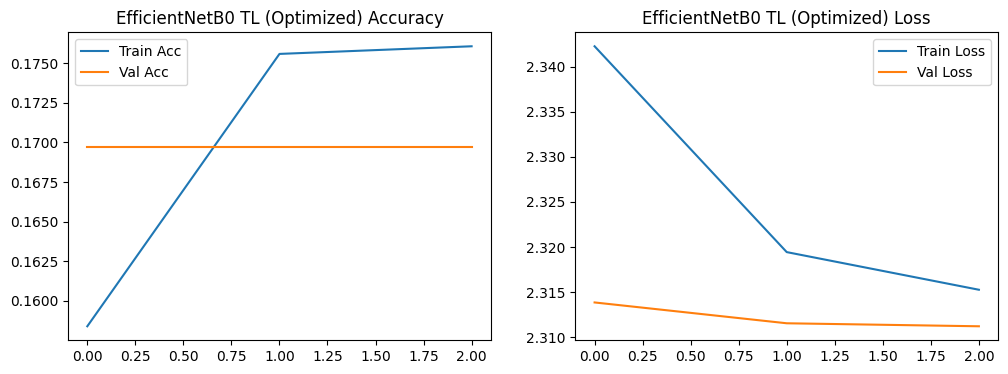

In [23]:
from tensorflow.keras.applications import EfficientNetB0

base_efficientnet = EfficientNetB0(weights='imagenet', include_top=False,
                                   input_shape=(img_height, img_width, 3))
base_efficientnet.trainable = False

model_efficientnet = models.Sequential([
    base_efficientnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

efficientnet_checkpoint = ModelCheckpoint('/content/drive/MyDrive/fish_efficientnetb0_best.h5',
                                          monitor='val_accuracy', save_best_only=True, verbose=1)

history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[efficientnet_checkpoint, early_stop]
)

model_efficientnet_best = tf.keras.models.load_model('/content/drive/MyDrive/fish_efficientnetb0_best.h5')
comparison_results.append(evaluate_model(model_efficientnet_best, history_efficientnet, test_generator, 'EfficientNetB0 TL (Optimized)', '/content/drive/MyDrive/fish_efficientnetb0_best.h5'))

In [11]:
import pandas as pd
df_results = pd.DataFrame(comparison_results)
df_results.sort_values(by="Accuracy", ascending=False, inplace=True)
df_results

NameError: name 'comparison_results' is not defined

In [13]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

In [14]:
# Model paths
model_paths = {
    "MobileNet": "/content/drive/MyDrive/fish_mobilenet_best.h5",
    "InceptionV3": "/content/drive/MyDrive/fish_inceptionv3_best.h5",
    "VGG16": "/content/drive/MyDrive/fish_vgg16_best.h5",
    "ResNet50": "/content/drive/MyDrive/fish_resnet50_best.h5",
    "EfficientNetB0": "/content/drive/MyDrive/fish_efficientnetb0_best.h5"
}

comparison_results = []

In [15]:
# Evaluate each model
for model_name, path in model_paths.items():
    if os.path.exists(path):
        print(f"\n📊 Evaluating {model_name}...")
        start_time = time.time()

        model = load_model(path)
        preds = model.predict(test_generator)
        y_pred = np.argmax(preds, axis=1)
        y_true = test_generator.classes

        acc = np.mean(y_pred == y_true)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        train_time = round(time.time() - start_time, 2)

        comparison_results.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Train Time": train_time
        })
    else:
        print(f"⚠️ {model_name} file not found at {path}")


📊 Evaluating MobileNet...


200/200 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step

📊 Evaluating InceptionV3...


200/200 ━━━━━━━━━━━━━━━━━━━━ 178s 867ms/step

📊 Evaluating VGG16...


200/200 ━━━━━━━━━━━━━━━━━━━━ 876s 4s/step

📊 Evaluating ResNet50...


200/200 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step

📊 Evaluating EfficientNetB0...


200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 580ms/step


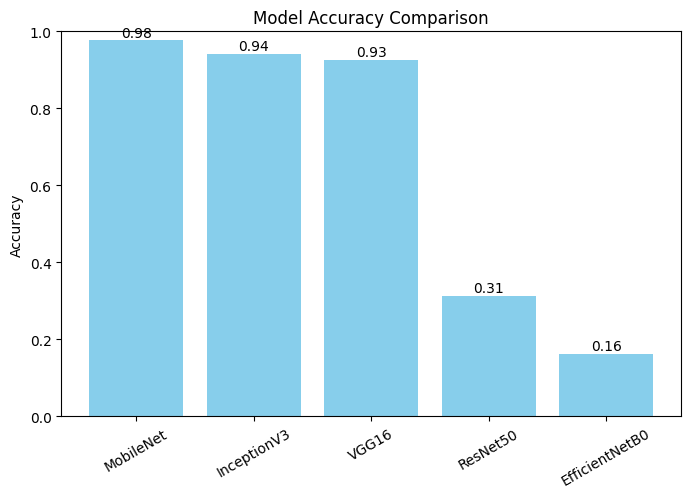

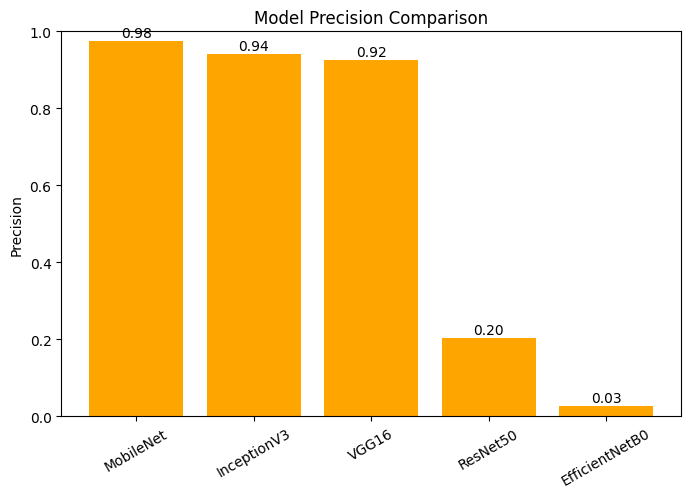

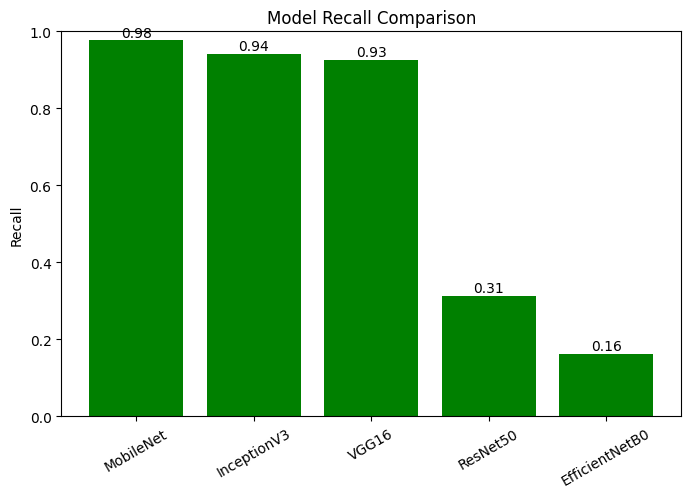

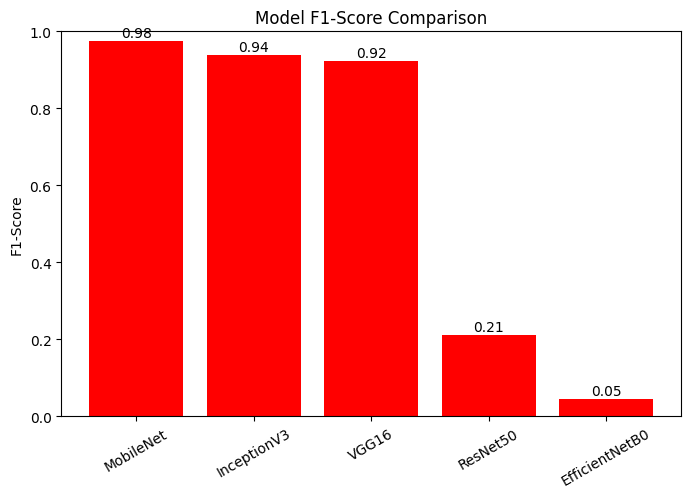

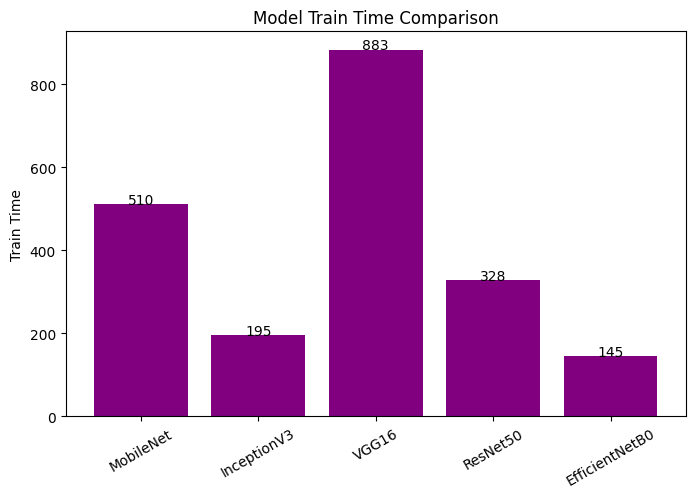

In [16]:
# Create DataFrame
df_results = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)

# --- Plot metric charts ---
def plot_metric(metric_name, color):
    plt.figure(figsize=(8,5))
    plt.bar(df_results["Model"], df_results[metric_name], color=color)
    plt.ylabel(metric_name)
    plt.title(f"Model {metric_name} Comparison")
    plt.xticks(rotation=30)
    if metric_name not in ["Train Time"]:
        plt.ylim(0, 1)
    for i, v in enumerate(df_results[metric_name]):
        plt.text(i, v + (0.01 if metric_name != "Train Time" else 1),
                 f"{v:.2f}" if metric_name != "Train Time" else f"{v:.0f}", ha='center')
    plt.show()

plot_metric("Accuracy", "skyblue")
plot_metric("Precision", "orange")
plot_metric("Recall", "green")
plot_metric("F1-Score", "red")
plot_metric("Train Time", "purple")

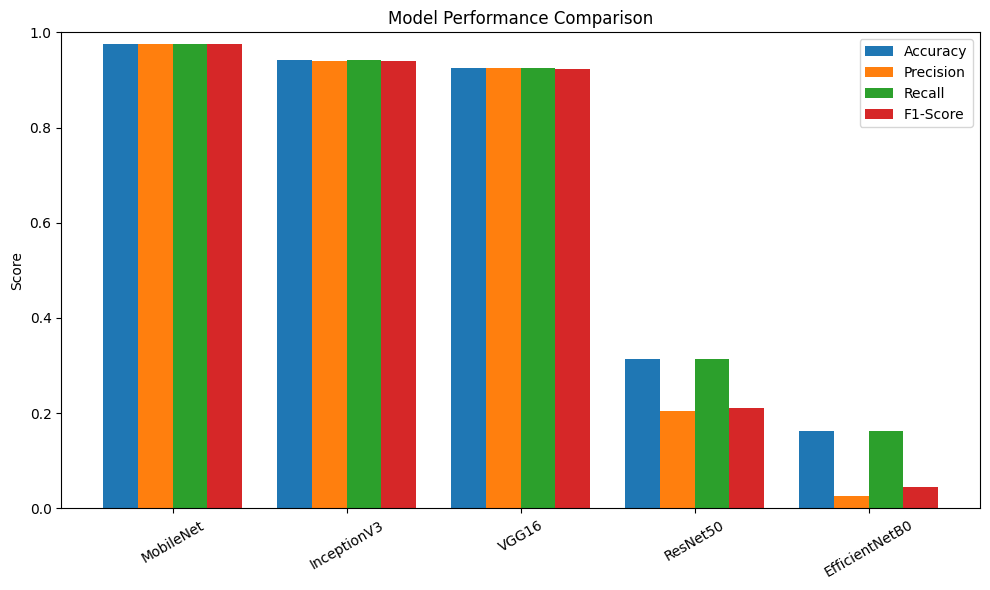

In [17]:
# --- Grouped bar chart ---
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
bar_width = 0.2
index = np.arange(len(df_results))

plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics):
    plt.bar(index + i*bar_width, df_results[metric], bar_width, label=metric)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.xticks(index + bar_width*(len(metrics)-1)/2, df_results["Model"], rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# --- Winner summary ---
print("\n🏆 BEST MODELS PER METRIC 🏆")
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    best_model = df_results.loc[df_results[metric].idxmax()]
    print(f"{metric}: {best_model['Model']} ({best_model[metric]:.4f})")


🏆 BEST MODELS PER METRIC 🏆
Accuracy: MobileNet (0.9765)
Precision: MobileNet (0.9759)
Recall: MobileNet (0.9765)
F1-Score: MobileNet (0.9761)


In [19]:
# --- Save final results ---
csv_path = "/content/drive/MyDrive/fish_model_comparison.csv"
df_results.to_csv(csv_path, index=False)
print(f"\n📁 Final results saved to: {csv_path}")


📁 Final results saved to: /content/drive/MyDrive/fish_model_comparison.csv



📊 Loading best accuracy model: MobileNet


200/200 ━━━━━━━━━━━━━━━━━━━━ 72s 357ms/step


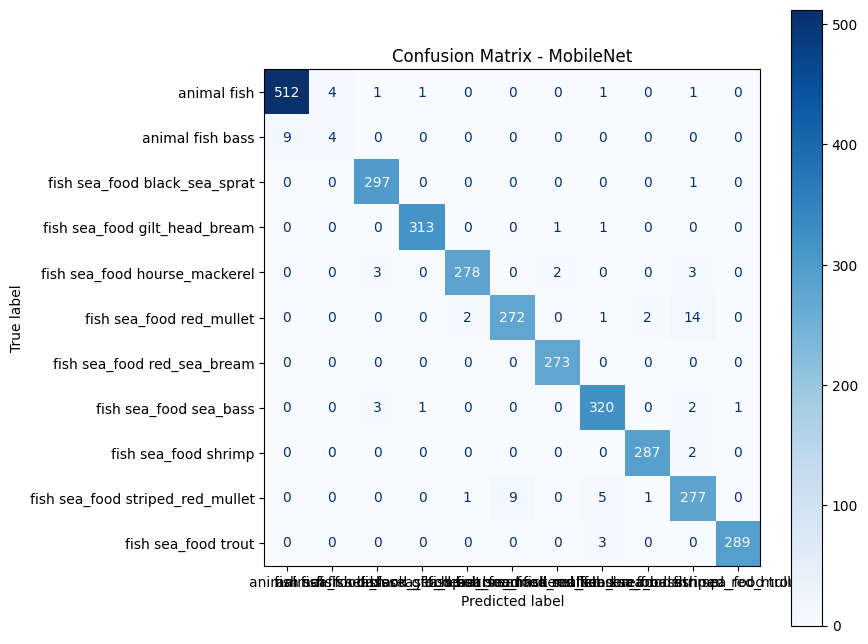

In [20]:
# --- Confusion matrix for best accuracy model ---
best_acc_model_name = df_results.iloc[0]["Model"]

if best_acc_model_name in model_paths and os.path.exists(model_paths[best_acc_model_name]):
    print(f"\n📊 Loading best accuracy model: {best_acc_model_name}")
    best_model = load_model(model_paths[best_acc_model_name])

    preds = best_model.predict(test_generator)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    fig, ax = plt.subplots(figsize=(8,8))
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {best_acc_model_name}")
    plt.show()
else:
    print(f"⚠️ No saved path found for {best_acc_model_name}. Skipping confusion matrix.")

In [61]:
!cp "/content/drive/MyDrive/fish_cnn_scratch.h5" .
!cp "/content/drive/MyDrive/fish_vgg16_best.h5" .
!cp "/content/drive/MyDrive/fish_resnet50_best.h5" .
!cp "/content/drive/MyDrive/fish_mobilenet_best.h5" .
!cp "/content/drive/MyDrive/fish_inceptionv3_best.h5" .
!cp "/content/drive/MyDrive/fish_efficientnetb0_best.h5" .
!cp "/content/drive/MyDrive/class_indices.json" .

cp: cannot stat '/content/drive/MyDrive/class_indices.json': No such file or directory


In [66]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import json

Overwriting app.py


In [67]:
# Paths to your saved models
MODEL_PATHS = {
    "CNN from Scratch": "fish_cnn_scratch.h5",
    "VGG16": "fish_vgg16_best.h5",
    "ResNet50": "fish_resnet50_best.h5",
    "MobileNet": "fish_mobilenet_best.h5",
    "InceptionV3": "fish_inceptionv3_best.h5",
    "EfficientNetB0": "fish_efficientnetb0_best.h5"
}

In [68]:
# Input sizes for each model
MODEL_INPUT_SIZES = {
    "CNN from Scratch": (224, 224),
    "VGG16": (150, 150),
    "ResNet50": (150, 150),
    "MobileNet": (150, 150),
    "InceptionV3": (150, 150),
    "EfficientNetB0": (150, 150)
}

In [69]:
# Load class names from JSON file
CLASS_NAMES = []
if os.path.exists("class_indices.json"):
    with open("class_indices.json", "r") as f:
        class_indices = json.load(f)
        CLASS_NAMES = list(class_indices.keys())
else:
    st.warning("⚠ class_indices.json not found. Please upload it to the app folder.")

In [70]:
@st.cache_resource
def load_model(model_path):
    return tf.keras.models.load_model(model_path)

In [71]:
def preprocess_image(img, model_name):
    target_size = MODEL_INPUT_SIZES[model_name]
    img = img.resize(target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

In [72]:
def predict_image(model, img, model_name):
    processed_img = preprocess_image(img, model_name)
    predictions = model.predict(processed_img)
    predicted_class = CLASS_NAMES[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_class, confidence, predictions[0]

st.title("🐟 Fish Species Classification")
st.write("Upload an image and choose a model to classify its species.")

selected_model_name = st.selectbox("Select a model", list(MODEL_PATHS.keys()))

if not os.path.exists(MODEL_PATHS[selected_model_name]):
    st.error(f"Model file '{MODEL_PATHS[selected_model_name]}' not found!")
else:
    model = load_model(MODEL_PATHS[selected_model_name])
    st.success(f"{selected_model_name} loaded successfully.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_container_width=True)

    if st.button("Predict"):
        if CLASS_NAMES:
            pred_class, conf, all_probs = predict_image(model, image, selected_model_name)
            st.markdown(f"**Prediction:** {pred_class}")
            st.markdown(f"**Confidence:** {conf:.2%}")
            st.subheader("Class Probabilities:")
            for cls, prob in zip(CLASS_NAMES, all_probs):
                st.write(f"{cls}: {prob:.2%}")
        else:
            st.error("No class names found. Please ensure class_indices.json is uploaded.")

2025-08-10 10:50:57.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 10:50:57.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [73]:
from pyngrok import ngrok
ngrok.set_auth_token("312yrdrWXwNO5QQ224LfIMshlaD_4ugpixfvGrUox93dJfGH9")

In [65]:
from pyngrok import ngrok

# Kills all active ngrok tunnels and the ngrok process
ngrok.kill()

# Now you can safely connect a new tunnel
public_url = ngrok.connect(8501)
print(public_url)

NgrokTunnel: "https://ec82d73be7f3.ngrok-free.app" -> "http://localhost:8501"
